# Kaggle House Prices

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [64]:
df=pd.read_csv("train.csv")

In [65]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [67]:
df.shape

(1460, 81)

In [68]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats=numerical_features.describe().T
html_numerical=create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')
display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [70]:
summary_stats

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [71]:
categorial_features = df.select_dtypes(include=[object])
cat_summary_stats=categorial_features.describe().T
html_categorial=create_scrollable_table(cat_summary_stats, 'categorial_features', 'Summary statistics for categorial features')
display(HTML(html_categorial))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


null_values=df.isnull().sum()
html_null_values=create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in dataset')
missing_percentage=(df.isnull().sum()/len(df))*100
html_missing_percentage=create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values')
display(HTML(html_null_values+html_missing_percentage))

In [72]:
rows_with_missing_values=df[df.isnull().any(axis=1)]
html_rows_with_missing_values=create_scrollable_table(rows_with_missing_values.head(), 'rows_with_missing_values', 'Rows with missing values')
display(HTML(html_rows_with_missing_values))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

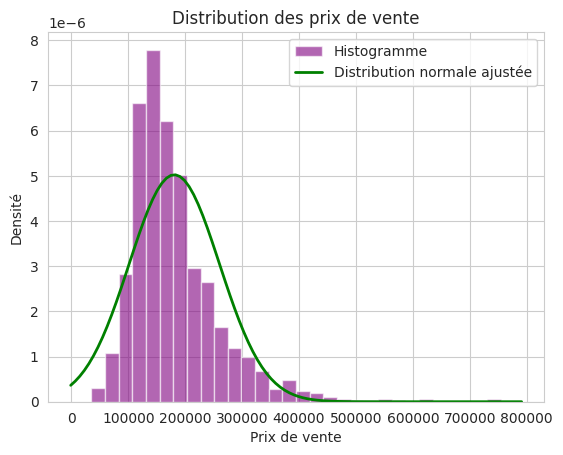

<Figure size 1200x1200 with 0 Axes>

In [75]:
sale_price = df['SalePrice']
# Calculer la moyenne et l'écart-type
mean, std = norm.fit(sale_price)

# Créer l'histogramme
plt.hist(sale_price, bins=30, density=True, alpha=0.6, color='purple', label='Histogramme')

# Créer la courbe de distribution normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'g', linewidth=2, label='Distribution normale ajustée')

# Ajouter des éléments esthétiques
plt.xlabel('Prix de vente')
plt.ylabel('Densité')
plt.title('Distribution des prix de vente')
plt.legend(loc='best')
plt.grid(True)
plt.figure(figsize=(12, 12))

# Afficher le graphique
plt.show()

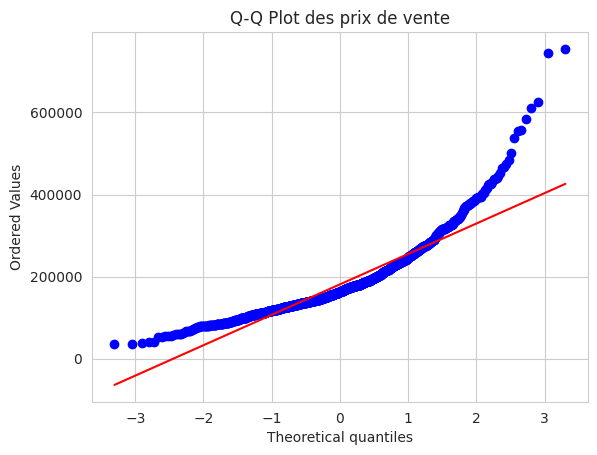

<Figure size 1000x600 with 0 Axes>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Charger les données (ajuster le chemin si nécessaire)
data = pd.read_csv("train.csv")

# Extraire la colonne des prix de vente
sale_price = data['SalePrice']

# Créer le Q-Q plot
stats.probplot(sale_price, dist="norm", plot=plt)
plt.title("Q-Q Plot des prix de vente")
plt.show()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)





plt.show()

In [77]:
import plotly.graph_objects as go

dwelling_types = df['BldgType'].value_counts()

dwelling_prices = df.groupby('BldgType')['SalePrice'].mean()
formatted_dwelling_prices = ['$'+f'{value:,.2f}' for value in dwelling_prices.values]

fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76,175,80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2,color='rgba(0,0,0,1)'), opacity=1)
)])

fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34,34,34,1)',
    paper_bgcolor='rgba(34,34,34,1)',
    font=dict(color='white')
)

In [78]:
fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156,39,176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2,color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by building Type',
    xaxis_title='Building Type',
    yaxis_title='Price',
    plot_bgcolor='rgba(34,34,34,1)',
    paper_bgcolor='rgba(34,34,34,1)',
    font=dict(color='white')
)

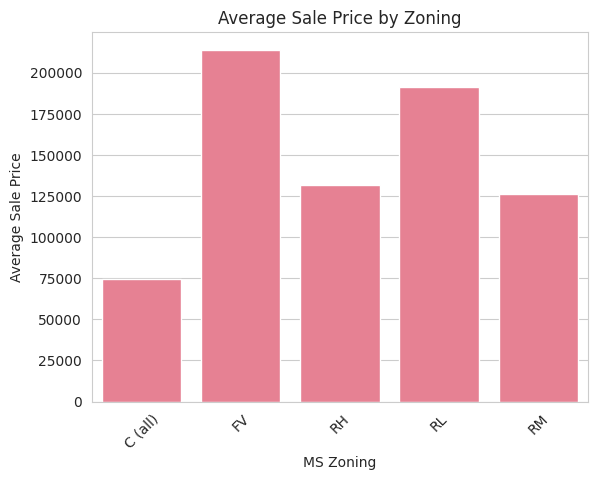

In [79]:
grouped_data = data.groupby('MSZoning')['SalePrice'].mean()

# Create the bar plot using Seaborn
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Customize the plot
plt.xlabel('MS Zoning')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Zoning')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [80]:
street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()
# Street Prices
colors_street = np.where(street_prices.index == 'Pave', 'purple', 'green')
fig5 = px.bar(x=street_prices.index, y=street_prices.values, title='Average Sale Price by Street Type',
                template='plotly_dark', text=street_prices.values,
                color=colors_street, color_discrete_sequence=['purple', 'green'])
fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='Street Type')
fig5.update_layout(showlegend=False)
# Alley Prices
colors_alley = np.where(alley_prices.index == 'Pave', 'purple', 'green')
fig6 = px.bar(x=alley_prices.index, y=alley_prices.values, title='Average Sale Price by Alley Type',
              template='plotly_dark', text=alley_prices.values,
              color=colors_alley,color_discrete_sequence=['purple', 'green'])

fig6.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig6.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig6.update_xaxes(title='Alley Type')
fig6.update_layout(showlegend=False)
fig5.show()
fig6.show()

In [81]:
colors = px.colors.qualitative.Plotly
shape_prices = df.groupby('LotShape') ['SalePrice' ].mean()
contour_prices = df.groupby('LandContour') ['SalePrice' ].mean()
# Shape Prices
fig7 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by Property Shape',
              template='plotly_dark', text=shape_prices.values)
fig7.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig7.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig7.update_xaxes(title='Property Shape')
fig7.update_layout (showlegend=False)
# Contour Prices
fig8 = px.bar(x=contour_prices.index, y=contour_prices.values, title='Average Sale Price by Property Contour',
              template='plotly_dark', text=contour_prices.values)
fig8.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig8.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig8.update_xaxes(title='Property Contour')
fig8.update_layout (showlegend=False)
fig7.show()
fig8.show()

In [82]:
df[ 'PropertyAge'] = df[ 'YrSold' ] - df['YearBuilt']
# Calculate Correlation between Property Age and Sale Price
age_price_corr = df[ 'PropertyAge'].corr(df[ 'SalePrice' ])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')
# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(df, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price')
fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor=' rgb(30,30,30)', font=dict(color='white'))
fig9.show()

Correlation between Property Age and Sale Price: -0.523350417546816


In [83]:
living_area_price_corr = df[ 'GrLivArea'].corr(df[ 'SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')
# Create a scatter plot to visualize the relationship between Living Area and Sale Price
fig10 = px.scatter(df, x='GrLivArea', y='SalePrice', title='Living Area (above grade) vs Sale Price', color='GrLivArea')
fig10.update_layout(plot_bgcolor=' rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))
fig10. show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126523


In [84]:
yearly_avg_sale_price = df.groupby('YrSold')['SalePrice'].mean()
fig13 = px.box(df, x='YrSold', y='SalePrice', title='Sale Price Trends Over the Years',
points=False, color_discrete_sequence=['green'])
fig13.add_trace(px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0])
fig13.update_traces(line=dict(color='purple', width=4), selector=dict(type=' scatter' , mode='lines'))
for year, avg_price in yearly_avg_sale_price.items() :
    fig13.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        font=dict(color='white'),
        showarrow=False,
        bgcolor='rgba(128, 0, 128, 0.6)'
    )
fig13.update_layout(
    plot_bgcolor='rgb(30,30,30)',
    paper_bgcolor='rgb (30, 30, 30)',
    font= dict(color='white'),
    xaxis_title='Year Sold',
    yaxis_title='Sale Price'
)
fig13.show()


In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer (strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [93]:
# Update categorical and numerical colurns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']) .columns
# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer (
    transformers= [
    (' num', numerical_transformer, numerical_columns),
     (' cat', categorical_transformer, categorical_columns)
  ], remainder = 'passthrough' )
# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
('preprocessor', preprocessor) ])
# Apply the pipeline to your dataset
X = df.drop( 'SalePrice', axis=1)
y = np.log(df['SalePrice']) #normalize dependent variable
X_preprocessed = pipeline.fit_transform(X)

In [94]:
from sklearn. linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor (random_state=42)
}
# Define the hyperparameter grids for
param_grids = {
    'LinearRegression' : {},
    'RandomForest': {
        'n_estimators': [100, 200,500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    }
}
#fold cross-validation
cv=KFold(n_splits=3,shuffle=True,random_state=42)
# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name)... ')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error')
    grids[model_name]. fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')


Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.17617500452990753

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15328948266043066



In [95]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor',preprocessor),
                         ('pca', pca)])
X_pca = pipeline_pca.fit_transform(X)


In [96]:
from sklearn. linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor (random_state=42)
}
# Define the hyperparameter grids for
param_grids = {
    'LinearRegression' : {},
    'RandomForest': {
        'n_estimators': [100, 200,500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    }
}
#fold cross-validation
cv=KFold(n_splits=3,shuffle=True,random_state=42)
# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name)... ')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error')
    grids[model_name]. fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')


Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.17617500452990753

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15328948266043066



In [97]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i+': '+str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))


LinearRegression: 0.13211974696146261
RandomForest: 0.14724341688728193


In [99]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i+': '+str(np.sqrt(mean_squared_error(grids[i].predict(X_test_pca), y_test))))

ValueError: X has 79 features, but LinearRegression is expecting 305 features as input.

In [107]:
from sklearn.preprocessing import FunctionTransformer
# feature engineering functions
def custom_features(df) :
    df_out = df. copy()
    df_out ['PropertyAge'] = df_out[ 'YrSold'] - df_out['YearBuilt']
    df_out[ 'TotalSF'] = df_out[ 'TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5* df[ 'BsmtHalfBath']
    df_out ['HasRemodeled' ] = (df_out ['YearRemodAdd'] != df_out ['YearBuilt' ]) .astype(object)
    df_out ['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out [ 'HasGarage'] = (df_out ['GarageArea'] > 0) .astype(object)
    df_out[ 'YrSold_cat'] = df_out[ 'YrSold'].astype(object)
    df_out[ 'MoSold_cat'] = df_out [ 'MoSold' ].astype(object)
    df_out[ 'YearBuilt_cat'] = df_out[ 'YearBuilt'].astype(object)
    df_out[ 'MSSubClass_cat'] = df_out[ 'MSSubClass'].astype(object)
    return df_out
feature_engineering_transformer = FunctionTransformer(custom_features)

In [110]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor' , 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat','YearBuilt_cat','MSSubClass_cat'])
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)
# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer (
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder = 'passthrough')
# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
     ('preprocessor' , preprocessor),
      ('pca', pca) ])
# Apply the pipeline to your dataset
X = df.drop( 'SalePrice', axis=1)
y = np.log(df['SalePrice'])


In [111]:
X_preprocessed_fe = pipeline_fe.fit_transform(X)

In [112]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)
# Define the models
models = {
'LinearRegression' : LinearRegression(),
'RandomForest': RandomForestRegressor (random_state=42),
}
# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest' : {
        'n_estimators': [100, 200, 500],
        'max_depth' : [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    }
}
# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name)... ')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error')
    grids_fe[model_name]. fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')


Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1639556787846854

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.1505582317335434



In [121]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i+': '+str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))


LinearRegression: 0.14226187253780323
RandomForest: 0.15217845687306217


In [122]:
df_test = pd.read_csv('test.csv')

In [123]:
df_test_preprocessed = pipeline_fe.transform(df_test)

In [124]:
# Random forest submission
y_rf=np.exp(grids_fe['RandomForest'].predict(df_test_preprocessed))
df_rf_out=pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_rf})
df_rf_out.to_csv('submission_rf.csv',index=False)

In [125]:
# linear regression submission
y_lr=np.exp(grids_fe['LinearRegression'].predict(df_test_preprocessed))
df_lr_out=pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_lr})
df_lr_out.to_csv('submission_lr.csv',index=False)

In [126]:
y_avg_ens=(y_rf+y_lr)/2
df_avg_ens_out=pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_avg_ens})
df_avg_ens_out.to_csv('submission_avg_ens.csv',index=False)

In [129]:
from sklearn.ensemble import StackingRegressor

best_estimators = [(model_name, grid.best_estimator_) for model_name, grid in grids_fe.items()]
# Define the candidate meta-models
meta_models = {
    'LinearRegression' : LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
}
# Define the hyperparameter grids for each meta-model
meta_param_grids = {
    'LinearRegression': {},
    'RandomForest' : {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__max_depth' : [None, 10, 30],
        'final_estimator__min_samples_split': [2, 5, 10],
    }
}
cv = KFold(n_splits=3, shuffle=True, random_state=42)
# Train and tune the meta-models
best_score=float('inf')
best_model=None
for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model,cv=cv)
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_fe, y_train_fe)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-1 * grid_search.best_score_)
    print(f'Best parameters for {meta_name}: {best_params}')
    print(f'Best RMSE for {meta_name}: {best_rmse}\n')
    if best_rmse < best_score:
        best_score = best_rmse
        best_model = grid_search
y_pred= best_model.predict(X_test_fe)
rmse=np.sqrt(mean_squared_error(y_test_fe,y_pred))
print(f'RMSE on the test set: {rmse}')

Training and tuning LinearRegression as the meta-model...
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.15279086455564592

Training and tuning RandomForest as the meta-model...


KeyboardInterrupt: 

In [130]:
y_stack=np.exp(best_model.predict(df_test_preprocessed))
df_stack_out=pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_stack})
df_stack_out.to_csv('submission_stack.csv',index=False)

In [131]:
df_stack_out.to_csv('submission_stack.csv',index=False)